In [1]:
import numpy as np
import sklearn.linear_model as skl
import pylab as py
import pandas as pd
import seaborn as sb
%matplotlib inline

In [2]:
model = skl.LinearRegression()


## Very Simple data 

In [56]:
xval = np.array([1,2,3,4,5]).reshape(-1,1)

In [57]:
xval

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [58]:
yval = np.array([1,2,3,4,5])

In [59]:
model.fit(xval,yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
model.predict(np.array([5]).reshape(-1,1))

array([5.])

In [61]:
model.predict(np.array([44]).reshape(-1,1))

array([44.])

## Add some errors

In [70]:
xval = np.array([1,2,3,3,4,3,6,8,9,10]).reshape(-1,1)
yval = np.array([1,2,3,4,5,6,7,7,9,10])
model.fit(xval,yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

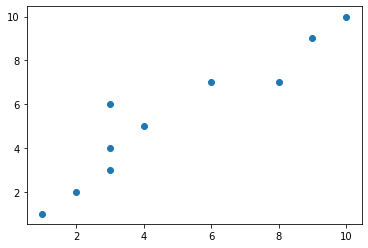

In [71]:
py.scatter(xval,yval)

In [72]:
model.predict(np.array([2]).reshape(-1,1))

array([2.84251969])

In [73]:
model.predict(np.array([44]).reshape(-1,1))

array([39.88188976])

In [74]:
model.score(xval,yval)

0.8818897637795275

## metrics

In [75]:
y_pred = model.predict(xval)

In [76]:
y_pred

array([1.96062992, 2.84251969, 3.72440945, 3.72440945, 4.60629921,
       3.72440945, 6.37007874, 8.13385827, 9.01574803, 9.8976378 ])

In [77]:
u = ((yval - y_pred) ** 2).sum()  
v = ((yval - yval.mean()) ** 2).sum()

In [78]:
1 - u/v

0.8818897637795275

In [79]:
model.score(xval,yval)

0.8818897637795275

In [80]:
import sklearn.metrics as skm

In [81]:
skm.r2_score(yval,y_pred)

0.8818897637795275

# more dimensions

In [82]:
samp=np.array([[1,2,300,14],
               [9,3,1,95],
               [5,7,11,58],
               [4,8,14,57],
               [2,1,2,27],
               [9,9,7,100],
               [12,3,21,126],
               [29,12,3,309],
               [2,40,11,90],
               [21,32,4,270],
               [7,13,8,79],
               [17,2,19,172],
               [13,24,13,159]])
df=pd.DataFrame(samp, columns=['X','Y','Z','W'])

In [83]:
df

X   Y    Z    W
0    1   2  300   14
1    9   3    1   95
2    5   7   11   58
3    4   8   14   57
4    2   1    2   27
5    9   9    7  100
6   12   3   21  126
7   29  12    3  309
8    2  40   11   90
9   21  32    4  270
10   7  13    8   79
11  17   2   19  172
12  13  24   13  159

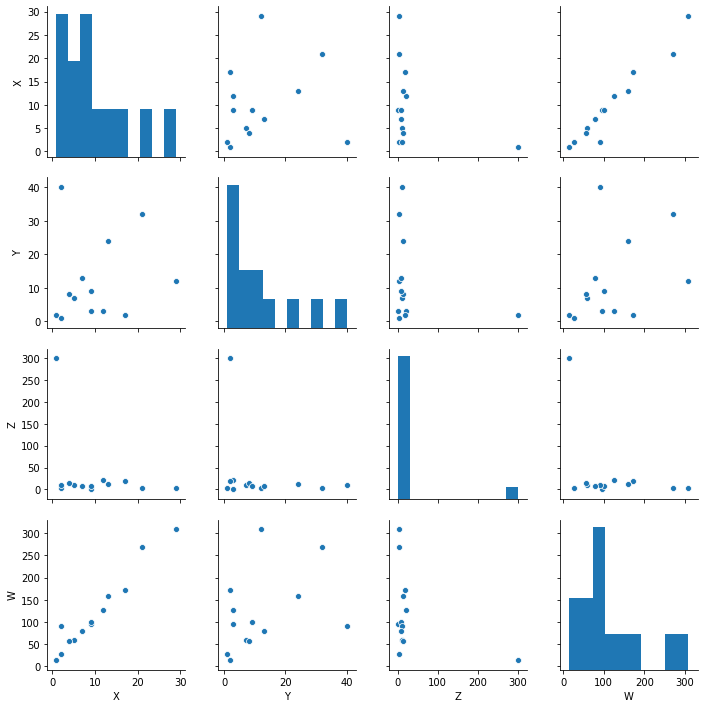

In [84]:
sb.pairplot(df)

In [85]:
xval=df[:8][['X','Y','Z']]

In [86]:
yval=df[:8][['W']]

In [87]:
model.fit(xval,yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
pred=model.predict(df[8:][['X','Y','Z']])

In [89]:
pred

array([[ 68.12886489],
       [249.65152055],
       [ 87.91908068],
       [175.75498023],
       [160.41262073]])

In [90]:
df[8:]

X   Y   Z    W
8    2  40  11   90
9   21  32   4  270
10   7  13   8   79
11  17   2  19  172
12  13  24  13  159

In [91]:
model.predict(np.array([23,5,40]).reshape(1,-1))

array([[239.17912225]])

In [92]:
df.corr()

X         Y         Z         W
X  1.000000  0.145237 -0.334792  0.969594
Y  0.145237  1.000000 -0.247521  0.374054
Z -0.334792 -0.247521  1.000000 -0.366937
W  0.969594  0.374054 -0.366937  1.000000

In [93]:
model.coef_

array([[ 1.00253720e+01,  1.12411075e+00, -4.78200390e-03]])

In [94]:
model.intercept_

array([3.16629318])

## deployment

In [96]:
23 * model.coef_[0,0] + 5 * model.coef_[0,1] + 40 * model.coef_[0,2] + model.intercept_[0] 

239.1791222491808